In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation
from sklearn.linear_model import LogisticRegression # Linear Regression Model
from sklearn.metrics import accuracy_score, confusion_matrix #model evaluation
from sklearn.cluster import KMeans # k-means
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('Cleaned_Subscriber_Information.csv')
df.head()

,ID,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Subscription Start Date,Subscription Expiration,Demo User,Free Trial User,...,Language_NED,Language_PAS,Language_POL,Language_POR,Language_RUS,Language_SVE,Language_TGL,Language_TUR,Language_URD,Language_VIE
0,4,Limited,INITIAL_PURCHASE,App,0.0,NaN,11/7/19,2/7/20,Yes,No,...,0,0,0,0,0,0,0,0,0,0
1,7,Limited,RENEWAL,Web,79.0,USD,7/21/19,11/11/19,Yes,No,...,0,0,0,0,0,0,0,0,0,0
2,10,Limited,RENEWAL,App,0.0,NaN,3/21/20,3/6/21,No,Yes,...,0,0,0,0,0,0,0,0,0,0
3,15,Limited,INITIAL_PURCHASE,App,0.0,NaN,9/1/19,3/1/20,Yes,No,...,0,0,0,0,0,0,0,0,0,0
4,37,Limited,INITIAL_PURCHASE,App,0.0,NaN,12/29/19,3/29/20,Yes,No,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(16540, 57)

In [ ]:
np.sum(df.isnull())

ID                               0
Subscription Type                0
Subscription Event Type          0
Purchase Store                   0
Purchase Amount                  0
Currency                      5808
Subscription Start Date          0
Subscription Expiration          0
Demo User                        0
Free Trial User                  0
Auto Renew                       0
Country                          0
User Type                        0
Lead Platform                    0
Email Subscriber                 0
Push Notifications               0
Send Count                       0
Open Count                       0
Click Count                      0
Unique Open Count                0
Unique Click Count               0
ID_Count                         0
Platform_Count                   0
Activity_Type_Count              0
USD_Adjusted_Amount           5808
Subscription Duration            0
Normalized Purchase Amount       0
Language_ARA                     0
Language_CHI        

In [ ]:
# for i in range(len(df)):
#   if df['Purchase Amount'].iloc[i] == 'NaN':
#     df['Purchase Amount'].iloc[i] = 0

# b
# # df = df[df.PurchaseAmount != 0]

# df.shape


(16540, 57)

In [ ]:
df.drop(['ID','Subscription Start Date', 'Subscription Expiration', 'User Type', 'Currency', 'Subscription Type', 'Unique Open Count', 'Unique Click Count'], axis='columns', inplace = True)

df.head()
df.shape

(16540, 49)

In [ ]:
df.dropna(inplace = True)
df.reset_index()

,index,Subscription Event Type,Purchase Store,Purchase Amount,Demo User,Free Trial User,Auto Renew,Country,Lead Platform,Email Subscriber,...,Language_NED,Language_PAS,Language_POL,Language_POR,Language_RUS,Language_SVE,Language_TGL,Language_TUR,Language_URD,Language_VIE
0,1,RENEWAL,Web,7.900000e+01,Yes,No,Off,Other,App,Yes,...,0,0,0,0,0,0,0,0,0,0
1,5,RENEWAL,Web,3.597000e+01,No,No,On,Other,Unknown,No,...,0,0,0,0,0,0,0,0,0,0
2,8,INITIAL_PURCHASE,Web,0.000000e+00,No,No,Off,US/Canada,Web,Yes,...,0,0,0,0,0,0,0,0,0,0
3,9,INITIAL_PURCHASE,App,4.499000e+07,No,No,On,Other,Unknown,No,...,0,0,0,0,0,0,0,0,0,0
4,10,INITIAL_PURCHASE,Web,1.990000e+02,Yes,No,Off,US/Canada,App,Yes,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10727,16534,INITIAL_PURCHASE,Web,2.121300e+02,No,No,Off,Other,Unknown,No,...,0,0,0,0,0,0,0,0,0,0
10728,16535,RENEWAL,Web,3.597000e+01,No,No,On,Other,Unknown,No,...,0,0,0,0,0,0,0,0,0,0
10729,16536,INITIAL_PURCHASE,Web,1.935772e+01,No,No,Off,Europe,Web,Yes,...,0,0,0,0,0,0,0,0,0,0
10730,16537,INITIAL_PURCHASE,Web,2.121300e+02,No,No,Off,Other,Unknown,No,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in range(len(df)):
    if df['Push Notifications'].iloc[i] == 'Yes':
        df['Push Notifications'].iloc[i] = 1
    else:
        df['Push Notifications'].iloc[i] = 0
    if df['Email Subscriber'].iloc[i] == 'Yes':
        df['Email Subscriber'].iloc[i] = 1
    else:
        df['Email Subscriber'].iloc[i] = 0
    if df['Free Trial User'].iloc[i] == 'Yes':
        df['Free Trial User'].iloc[i] = 1
    else:
        df['Free Trial User'].iloc[i] = 0
    if df['Demo User'].iloc[i] == 'Yes':
        df['Demo User'].iloc[i] = 1
    else:
        df['Demo User'].iloc[i] = 0
    if df['Lead Platform'].iloc[i] == 'App':
        df['Lead Platform'].iloc[i] = 1
    else:
        df['Lead Platform'].iloc[i] = 0
    if df['Auto Renew'].iloc[i] == 'On':
        df['Auto Renew'].iloc[i] = 1
    else:
        df['Auto Renew'].iloc[i] = 0
    if df['Purchase Store'].iloc[i] == 'App':
        df['Purchase Store'].iloc[i] = 1
    else:
        df['Purchase Store'].iloc[i] = 0

df.reset_index()

,index,Subscription Event Type,Purchase Store,Purchase Amount,Demo User,Free Trial User,Auto Renew,Country,Lead Platform,Email Subscriber,...,Language_NED,Language_PAS,Language_POL,Language_POR,Language_RUS,Language_SVE,Language_TGL,Language_TUR,Language_URD,Language_VIE
0,1,RENEWAL,0,7.900000e+01,1,0,0,Other,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,RENEWAL,0,3.597000e+01,0,0,1,Other,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,INITIAL_PURCHASE,0,0.000000e+00,0,0,0,US/Canada,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9,INITIAL_PURCHASE,1,4.499000e+07,0,0,1,Other,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,INITIAL_PURCHASE,0,1.990000e+02,1,0,0,US/Canada,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10727,16534,INITIAL_PURCHASE,0,2.121300e+02,0,0,0,Other,0,0,...,0,0,0,0,0,0,0,0,0,0
10728,16535,RENEWAL,0,3.597000e+01,0,0,1,Other,0,0,...,0,0,0,0,0,0,0,0,0,0
10729,16536,INITIAL_PURCHASE,0,1.935772e+01,0,0,0,Europe,0,1,...,0,0,0,0,0,0,0,0,0,0
10730,16537,INITIAL_PURCHASE,0,2.121300e+02,0,0,0,Other,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.get_dummies(df, columns=['Subscription Event Type'])
df = pd.get_dummies(df, columns = ['Country'])
df.head()

,Purchase Store,Purchase Amount,Demo User,Free Trial User,Auto Renew,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,...,Language_SVE,Language_TGL,Language_TUR,Language_URD,Language_VIE,Subscription Event Type_INITIAL_PURCHASE,Subscription Event Type_RENEWAL,Country_Europe,Country_Other,Country_US/Canada
1,0,79.00,1,0,0,1,1,1,2,0,...,0,0,0,0,0,0,1,0,1,0
5,0,35.97,0,0,1,0,0,0,3,1,...,0,0,0,0,0,0,1,0,1,0
8,0,0.00,0,0,0,0,1,1,17,0,...,0,0,0,0,0,1,0,0,0,1
9,1,44990000.00,0,0,1,0,0,0,10,1,...,0,0,0,0,0,1,0,0,1,0
10,0,199.00,1,0,0,1,1,1,6,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df.shape

(10732, 52)

In [ ]:
df = df[df['Purchase Amount'] <= 1000]


In [ ]:
df['Email Open %'] = df['Open Count'] / df['Send Count']
df['Email Click %'] = df['Click Count'] / df['Send Count']


In [ ]:
df.head()

,Purchase Store,Purchase Amount,Demo User,Free Trial User,Auto Renew,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,...,Language_TUR,Language_URD,Language_VIE,Subscription Event Type_INITIAL_PURCHASE,Subscription Event Type_RENEWAL,Country_Europe,Country_Other,Country_US/Canada,Email Open %,Email Click %
1,0,79.00,1,0,0,1,1,1,2,0,...,0,0,0,0,1,0,1,0,0.000000,0.0
5,0,35.97,0,0,1,0,0,0,3,1,...,0,0,0,0,1,0,1,0,0.333333,0.0
8,0,0.00,0,0,0,0,1,1,17,0,...,0,0,0,1,0,0,0,1,0.000000,0.0
10,0,199.00,1,0,0,1,1,1,6,1,...,0,0,0,1,0,0,0,1,0.166667,0.0
12,0,34.64,0,0,0,0,0,0,10,0,...,0,0,0,1,0,0,1,0,0.000000,0.0


In [ ]:
# ggplot(df, aes(x='Country', y='Purchase Amount', fill = 'Country')) + stat_summary(geom='bar')

PlotnineError: ignored

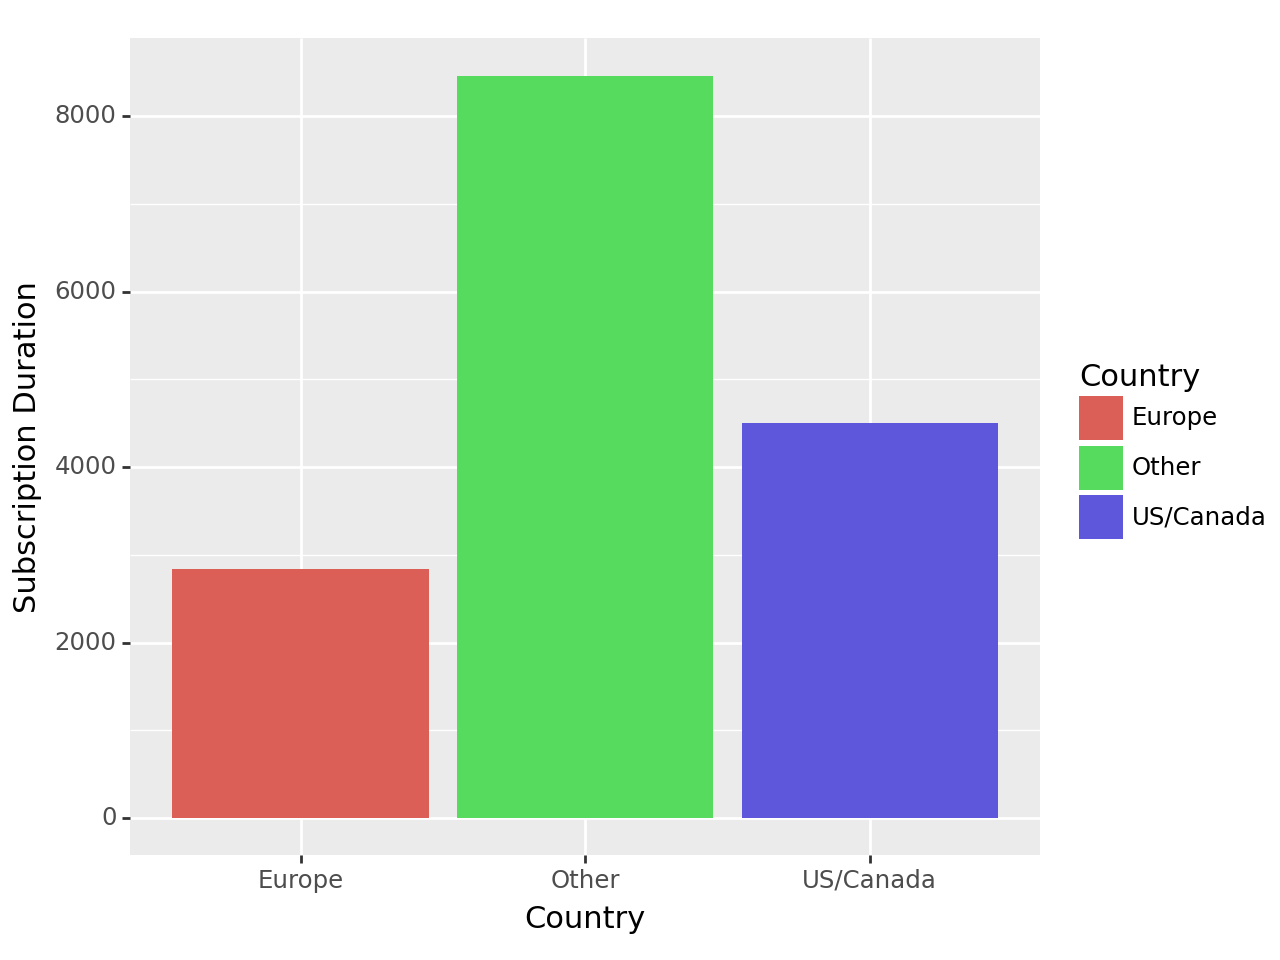

<Figure Size: (640 x 480)>

In [ ]:
# ggplot(df, aes(x='Country', y='Subscription Duration', fill = 'Country')) + stat_summary(geom='bar')

In [ ]:
df['Auto Renew'] = df['Auto Renew'].astype(float)

In [ ]:
df.head()

,Purchase Store,Purchase Amount,Demo User,Free Trial User,Auto Renew,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,...,Language_TUR,Language_URD,Language_VIE,Subscription Event Type_INITIAL_PURCHASE,Subscription Event Type_RENEWAL,Country_Europe,Country_Other,Country_US/Canada,Email Open %,Email Click %
1,0,79.00,1,0,0.0,1,1,1,2,0,...,0,0,0,0,1,0,1,0,0.000000,0.0
5,0,35.97,0,0,1.0,0,0,0,3,1,...,0,0,0,0,1,0,1,0,0.333333,0.0
8,0,0.00,0,0,0.0,0,1,1,17,0,...,0,0,0,1,0,0,0,1,0.000000,0.0
10,0,199.00,1,0,0.0,1,1,1,6,1,...,0,0,0,1,0,0,0,1,0.166667,0.0
12,0,34.64,0,0,0.0,0,0,0,10,0,...,0,0,0,1,0,0,1,0,0.000000,0.0


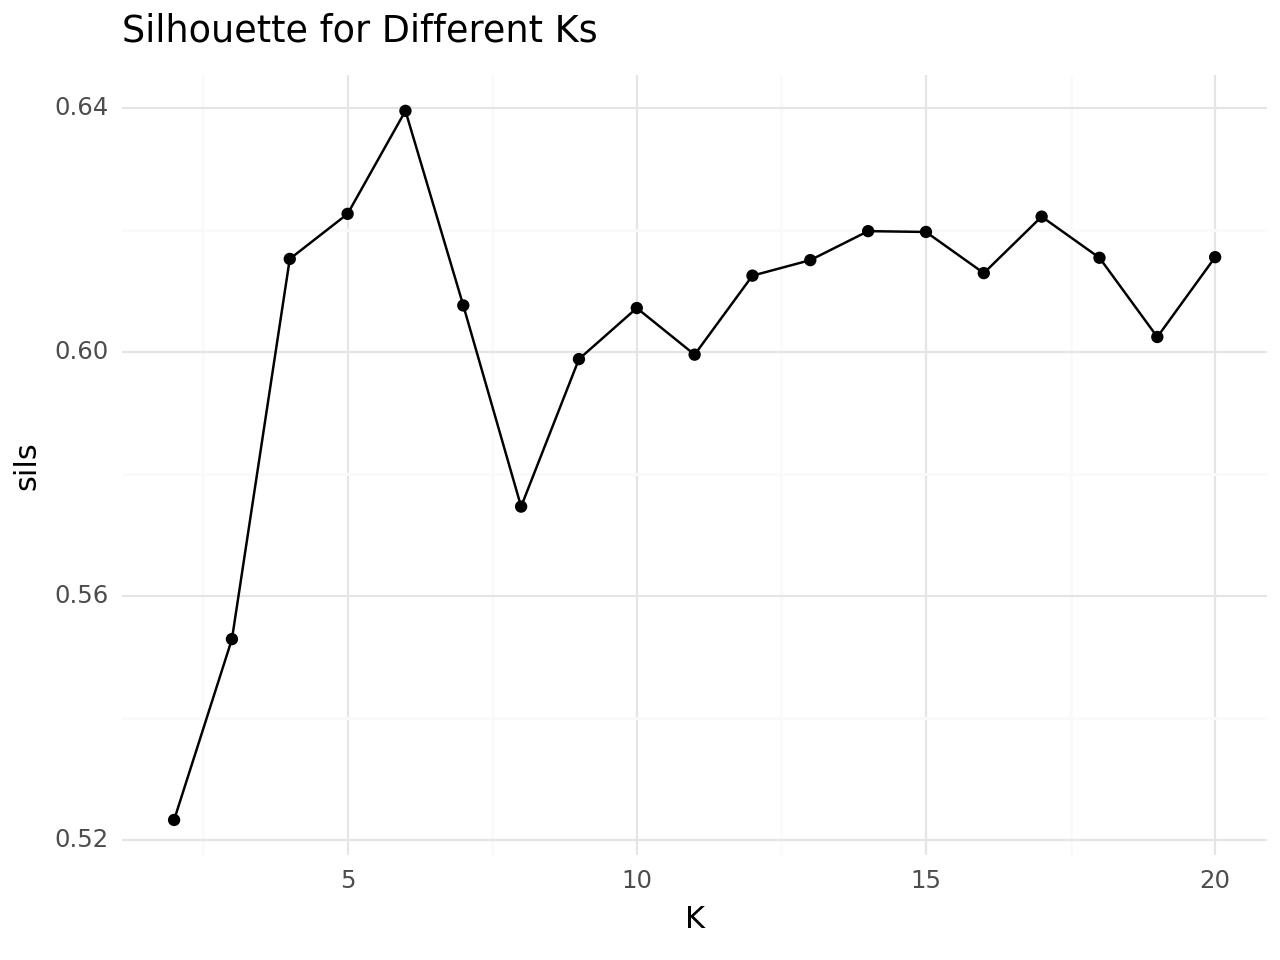

<Figure Size: (640 x 480)>

In [ ]:
#Instantiate Standard scalar object for Kmeans model, collate predictors
zs = StandardScaler()
predictors = ["Email Open %", "Auto Renew", 'Subscription Duration', 'Purchase Amount']

# assign X variable to three inflation metrics, zscore and fit
X = df[predictors]
X[predictors] = zs.fit_transform(X[predictors])

# Set up for CV (tuning/optimizing our hyperparamter)
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
sils = []

# For loop iterates through each k-value, fits a model to it and records the silhouette scores of each associative model
for k in ks:
  km = KMeans(n_clusters = k)
  km.fit(X[predictors])

  sils.append(silhouette_score(X[predictors], km.predict(X[predictors])))

# create df for ggplot
sil_df = pd.DataFrame({"K": ks,
                      "silhouette": sils})

#plot of hyperparameter tuning
(ggplot(sil_df, aes(x = "K", y = "sils")) + geom_point() +
geom_line() +
theme_minimal() +
ggtitle("Silhouette for Different Ks"))

In [ ]:
#FINAL KMeans Model

# Create new KMeans object, set hyperparameter to 3, fit the model and assign membership
km1 = KMeans(n_clusters = 4)
km1.fit(X[predictors])
membership = km1.predict(X[predictors])

X['cluster'] = membership
print("Silhouette Score (n_clusters = 4): ",sils[3])
# ggplot(k_df, aes(x = 'USDAdjusted', y = 'Subscription Length (days)', fill = 'cluster')) + geom_point() + coord_cartesian(xlim=(0, 400), ylim=(0, 1500))

Silhouette Score (n_clusters = 4):  0.6226684721604728


In [ ]:
k_df = df[predictors]
k_df.head()

,Email Open %,Auto Renew,Subscription Duration,Purchase Amount
1,0.000000,0.0,113,79.00
5,0.333333,1.0,274,35.97
8,0.000000,0.0,182,0.00
10,0.166667,0.0,28789,199.00
12,0.000000,0.0,91,34.64


In [ ]:
k_df['Cluster'] = km1.labels_

# Calculate the average of each predictor for each cluster
cluster_averages = k_df.groupby('Cluster').mean()
print()
print("Silhouette Score (Four Clusters): ",sils[3], '\n\n', cluster_averages)


Silhouette Score (Four Clusters):  0.6223271836259553 

          Email Open %  Auto Renew  Subscription Duration  Purchase Amount
Cluster                                                                  
0            0.190602    0.001397           28709.432231       203.743251
1            0.075564    1.000000             304.995298        51.891677
2            0.039036    0.000000            1002.154324        29.861447
3            0.878711    0.546701            2290.696658        57.404074


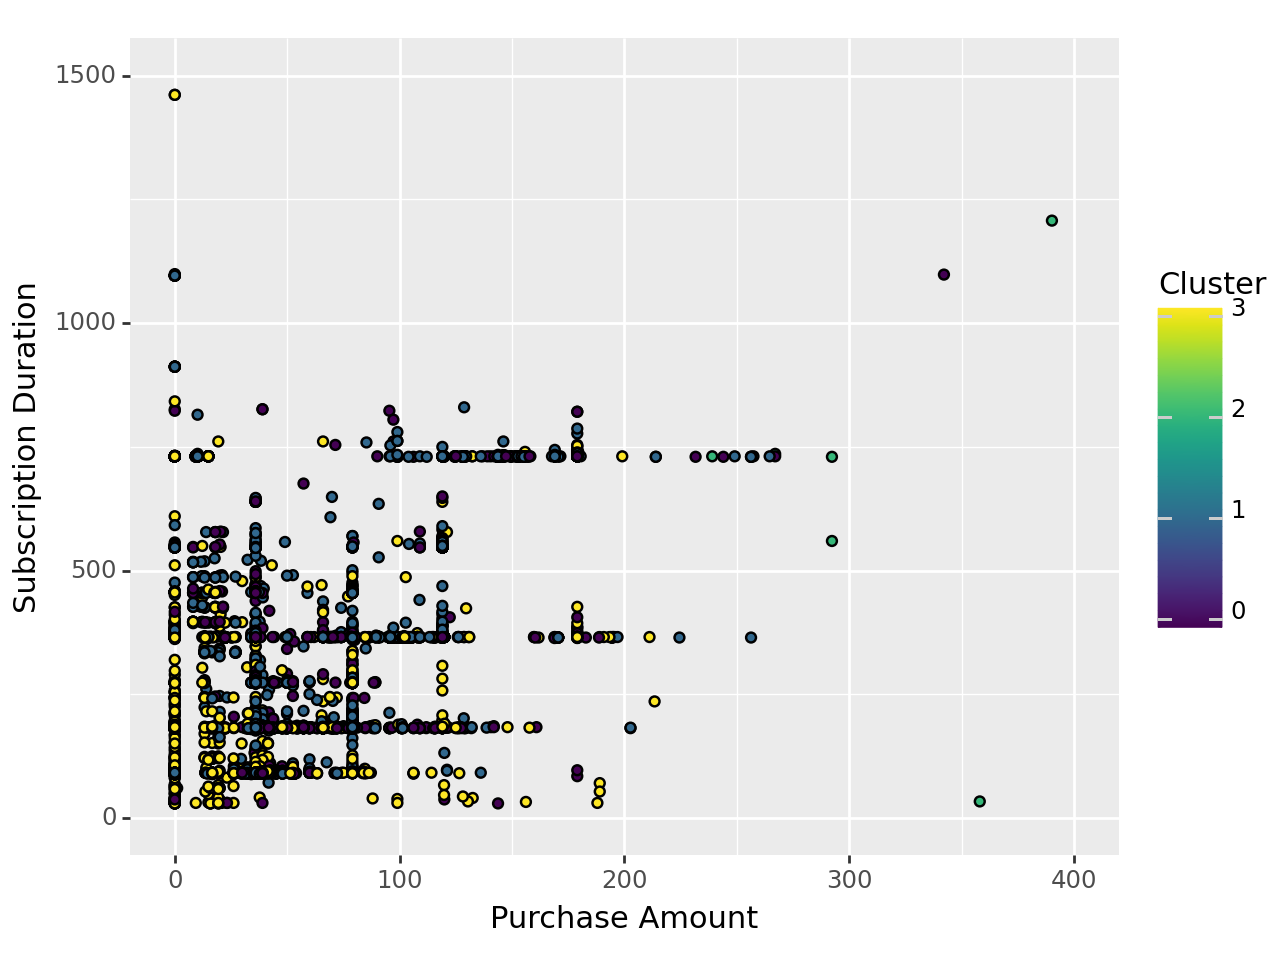

<Figure Size: (640 x 480)>

In [ ]:
ggplot(k_df, aes(x = 'Purchase Amount', y = 'Subscription Duration', fill = 'Cluster')) + geom_point() + coord_cartesian(xlim=(0, 400), ylim=(0, 1500))

In [ ]:

silhouette_score(k_df, membership)

0.0761439246325425

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10042 entries, 1 to 16538
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Purchase Store                            10042 non-null  object 
 1   Purchase Amount                           10042 non-null  float64
 2   Demo User                                 10042 non-null  object 
 3   Free Trial User                           10042 non-null  object 
 4   Auto Renew                                10042 non-null  float64
 5   Lead Platform                             10042 non-null  object 
 6   Email Subscriber                          10042 non-null  object 
 7   Push Notifications                        10042 non-null  object 
 8   Send Count                                10042 non-null  int64  
 9   Open Count                                10042 non-null  int64  
 10  Click Count                       

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

predictors = ['Subscription Event Type_INITIAL_PURCHASE', 'Subscription Event Type_RENEWAL', 'Demo User', 'Free Trial User',
                  'Auto Renew', 'Email Subscriber', 'Push Notifications', 'Email Open %','ID_Count','Activity_Type_Count']

# Assuming df and predictors are defined as in the previous example

X = df[predictors]
y = df['Purchase Amount']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# Extracting feature importances
feature_importances = rf_model.feature_importances_

# Creating a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': predictors, 'Importance': feature_importances})

# Sorting the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Predicting Purchase Amount')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


In [ ]:
importances_df

,Feature,Importance
7,Email Open %,0.261219
8,ID_Count,0.214252
9,Activity_Type_Count,0.125590
4,Auto Renew,0.123324
5,Email Subscriber,0.075059
6,Push Notifications,0.064074
1,Subscription Event Type_RENEWAL,0.040134
2,Demo User,0.038420
3,Free Trial User,0.029263
0,Subscription Event Type_INITIAL_PURCHASE,0.028664


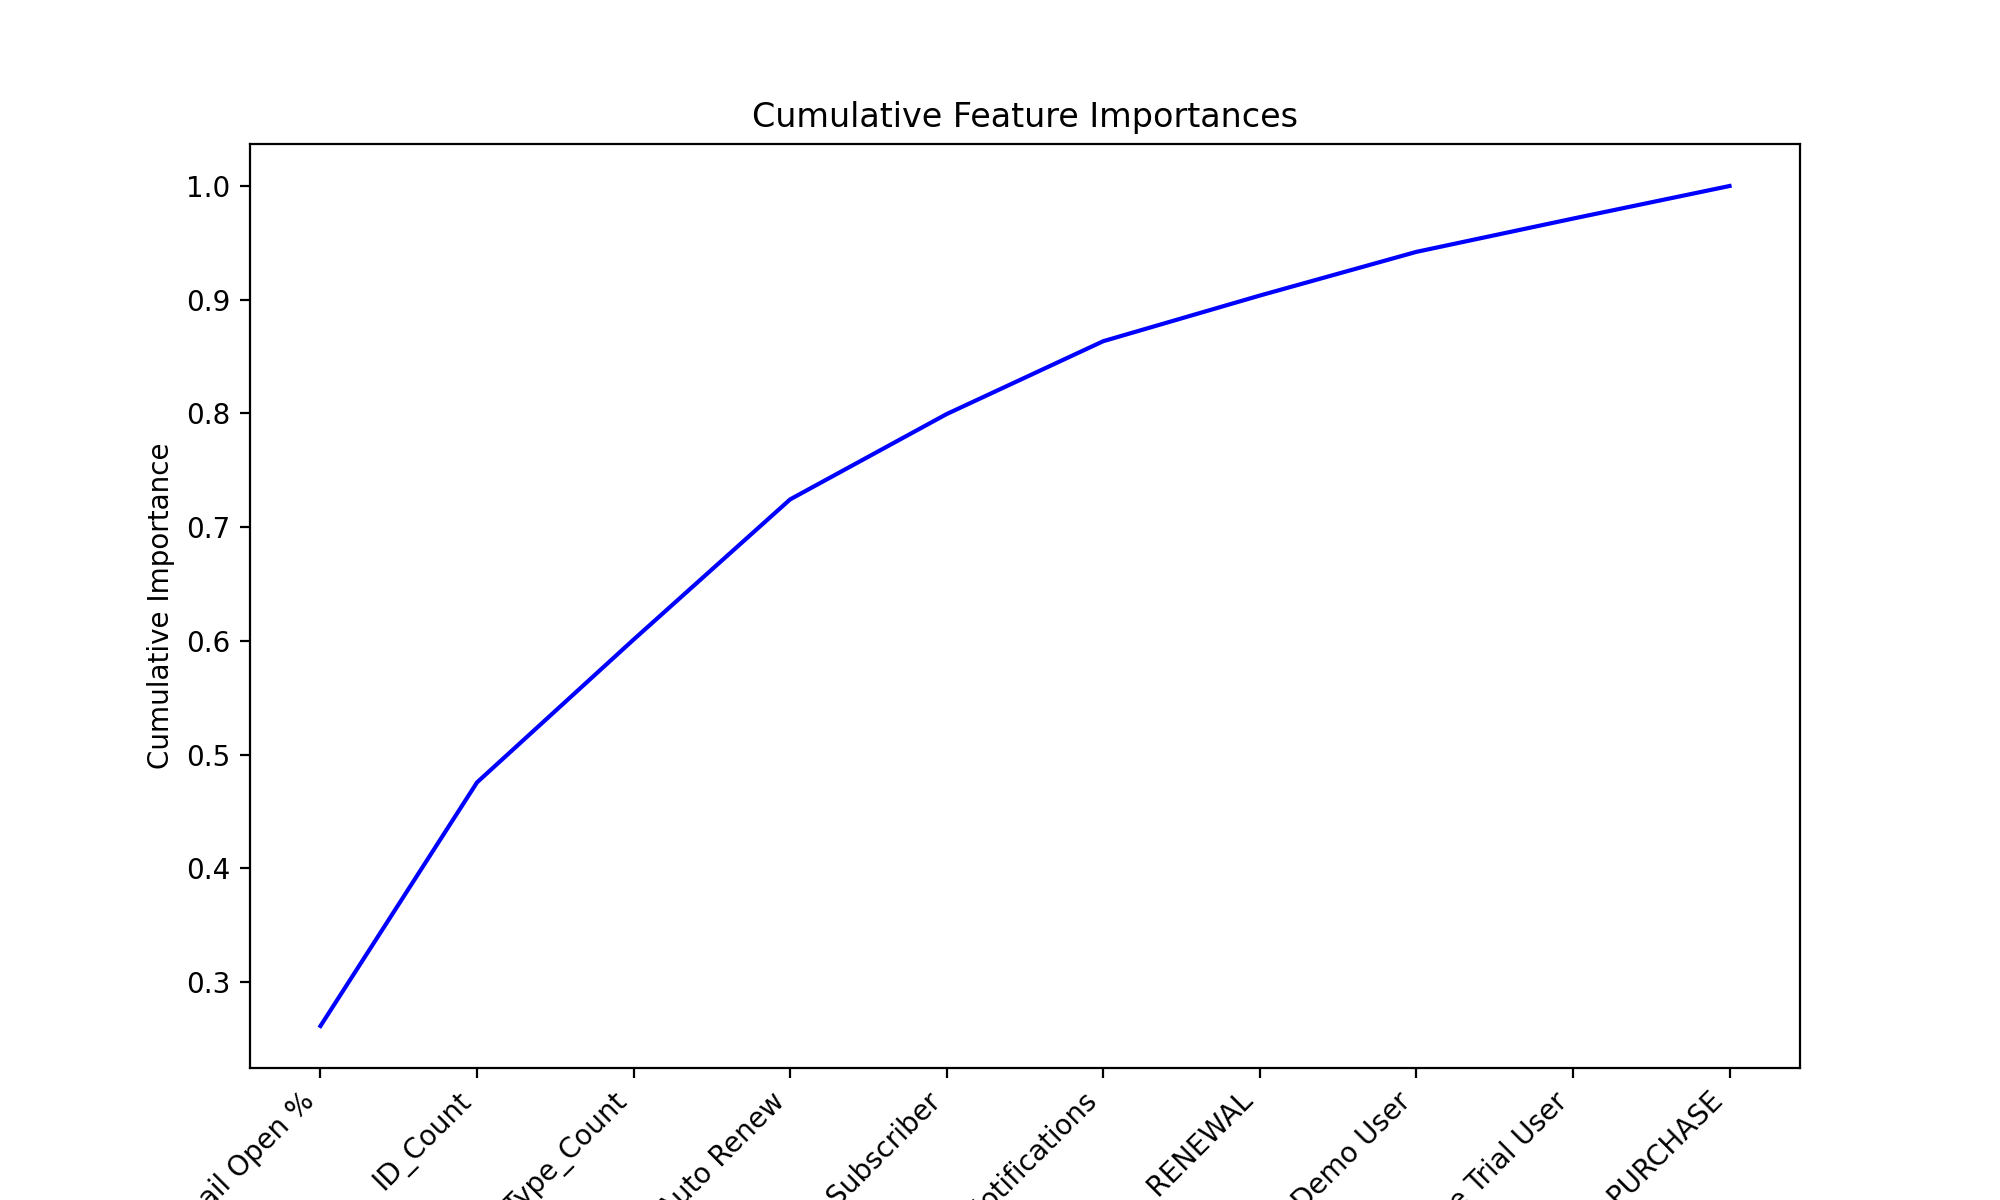

In [ ]:
importances_df['Cumulative Importance'] = importances_df['Importance'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(importances_df['Feature'], importances_df['Cumulative Importance'], 'b-')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importances')
plt.show()


ERROR: Could not find a version that satisfies the requirement sklearn.inspection (from versions: none)
ERROR: No matching distribution found for sklearn.inspection


In [ ]:
# from sklearn import plot_partial_dependence

# # Selecting top N features (e.g., top 3 for simplicity)
# top_features = importances_df['Feature'][:3]

# fig, ax = plt.subplots(figsize=(10, 6))
# plot_partial_dependence(rf_model, features=top_features, X=X_train, ax=ax)
# plt.show()


ImportError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Calculating R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


R-squared: 0.2233741036283422
Mean Squared Error: 4607.406134153336


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

predictors = ['Subscription Event Type_INITIAL_PURCHASE', 'Subscription Event Type_RENEWAL', 'Demo User', 'Free Trial User',
                  'Auto Renew', 'Email Subscriber', 'Push Notifications', 'Email Open %','ID_Count','Activity_Type_Count']

# Assuming df and predictors are defined as in the previous example

X = df[predictors]
y = df['Subscription Duration']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# Extracting feature importances
feature_importances = rf_model.feature_importances_

# Creating a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': predictors, 'Importance': feature_importances})

# Sorting the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Predicting Subscription Duration')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

In [ ]:
importances_df

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Calculating R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


R-squared: 0.3668368024253542
Mean Squared Error: 89418568.10766277


In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10042 entries, 1 to 16538
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Purchase Store                            10042 non-null  object 
 1   Purchase Amount                           10042 non-null  float64
 2   Demo User                                 10042 non-null  object 
 3   Free Trial User                           10042 non-null  object 
 4   Auto Renew                                10042 non-null  float64
 5   Lead Platform                             10042 non-null  object 
 6   Email Subscriber                          10042 non-null  object 
 7   Push Notifications                        10042 non-null  object 
 8   Send Count                                10042 non-null  int64  
 9   Open Count                                10042 non-null  int64  
 10  Click Count                       

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#'Purchase Amount'
# Assuming 'df' is your DataFrame
# , 'Subscription Duration'
predictors = ['Purchase Amount', 'Subscription Duration', 'Demo User', 'Free Trial User', 'Email Open %', 'ID_Count',
              'Activity_Type_Count', 'Push Notifications', 'Click Count']
X = df[predictors]
y = df['Auto Renew']  # Assuming 'Auto Renew' is already in numeric format

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}",'\n')
print(classification_report(y_test, y_pred))


In [ ]:
# Feature Importance Plot
import matplotlib.pyplot as plt
import pandas as pd

# Assuming rf_classifier is your trained RandomForestClassifier model
feature_importances = rf_classifier.feature_importances_
features = pd.DataFrame({'Feature': predictors, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 6))
plt.barh(features['Feature'], features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Predicting Customer Churn')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
features

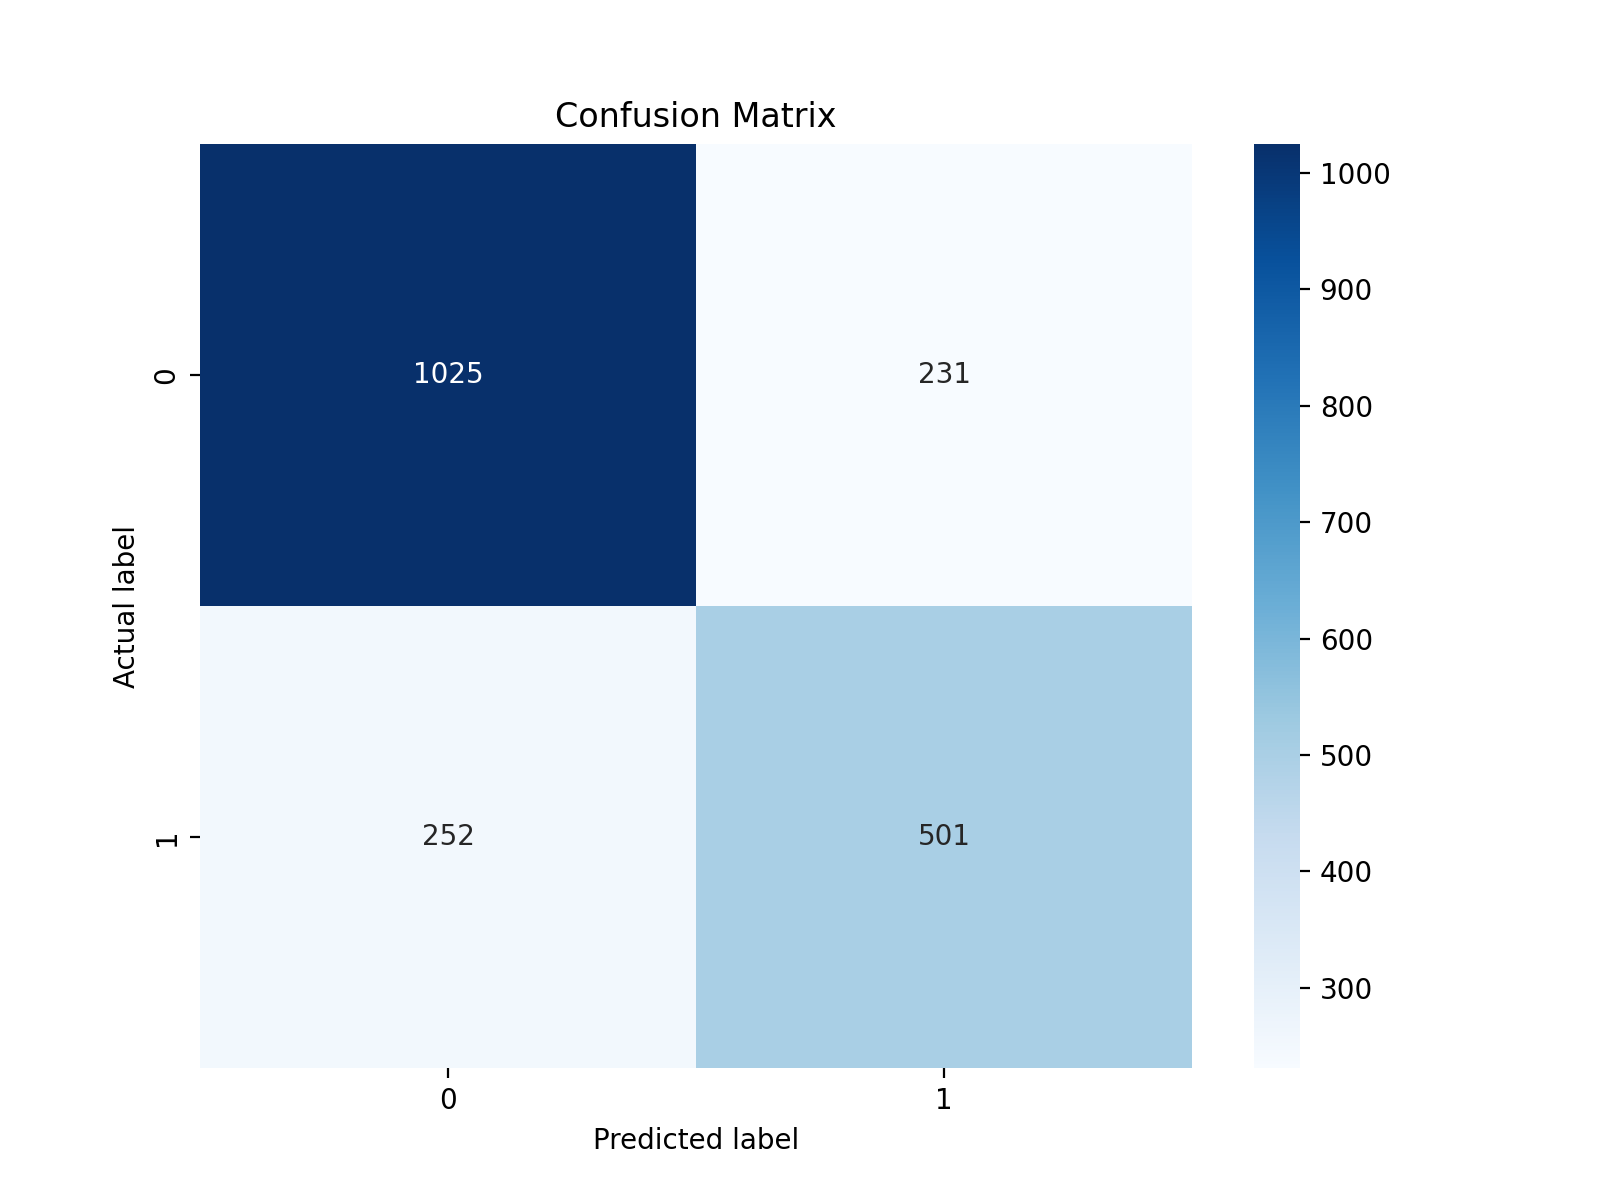

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


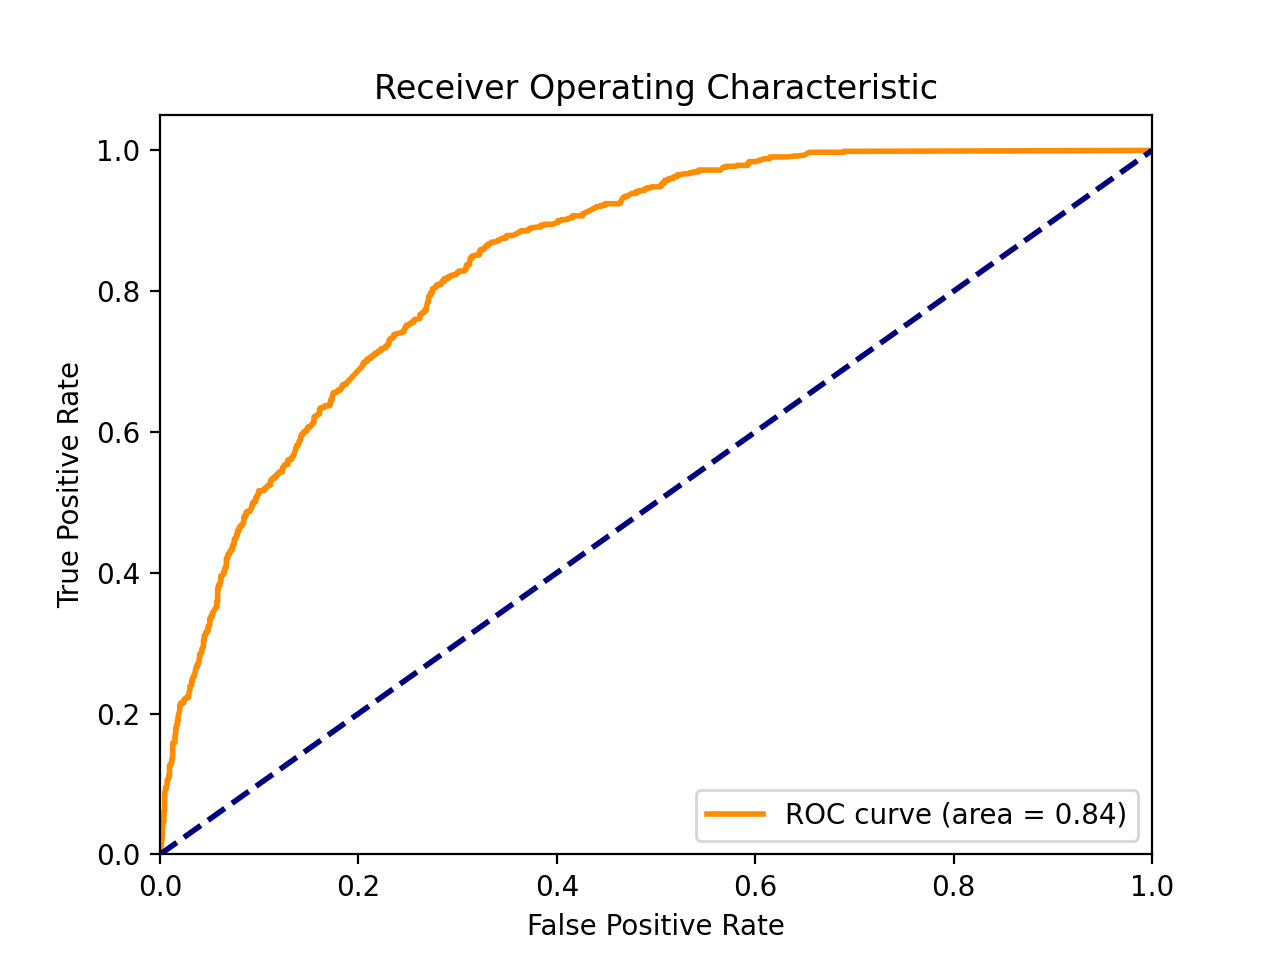

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Download as PDF with Jupyter Notebook

# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/410_Final.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "410_Final.ipynb"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fo